Optimized Deep Learning and Clustering with PSO-DBSCAN

Section 1: Imports and Dependencies

In [12]:
import numpy as np
import tensorflow as tf
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten
from keras.models import Model
from keras.datasets import mnist
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

Section 2: Define Deep Learning Models with Hyperparameters

In [13]:
def build_autoencoder(input_dim, first_layer_neurons, second_layer_neurons):
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(first_layer_neurons, activation='relu')(input_layer)
    encoded = Dense(second_layer_neurons, activation='relu')(encoded)
    decoded = Dense(first_layer_neurons, activation='relu')(encoded)
    decoded = Dense(input_dim, activation='sigmoid')(decoded)

    autoencoder = Model(input_layer, decoded)
    encoder = Model(input_layer, encoded)

    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder, encoder

def build_cnn(input_shape, num_filters, kernel_size):
    model = tf.keras.Sequential()
    model.add(Conv2D(num_filters, (kernel_size, kernel_size), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))

    return model


Section 3: Load and Preprocess Data

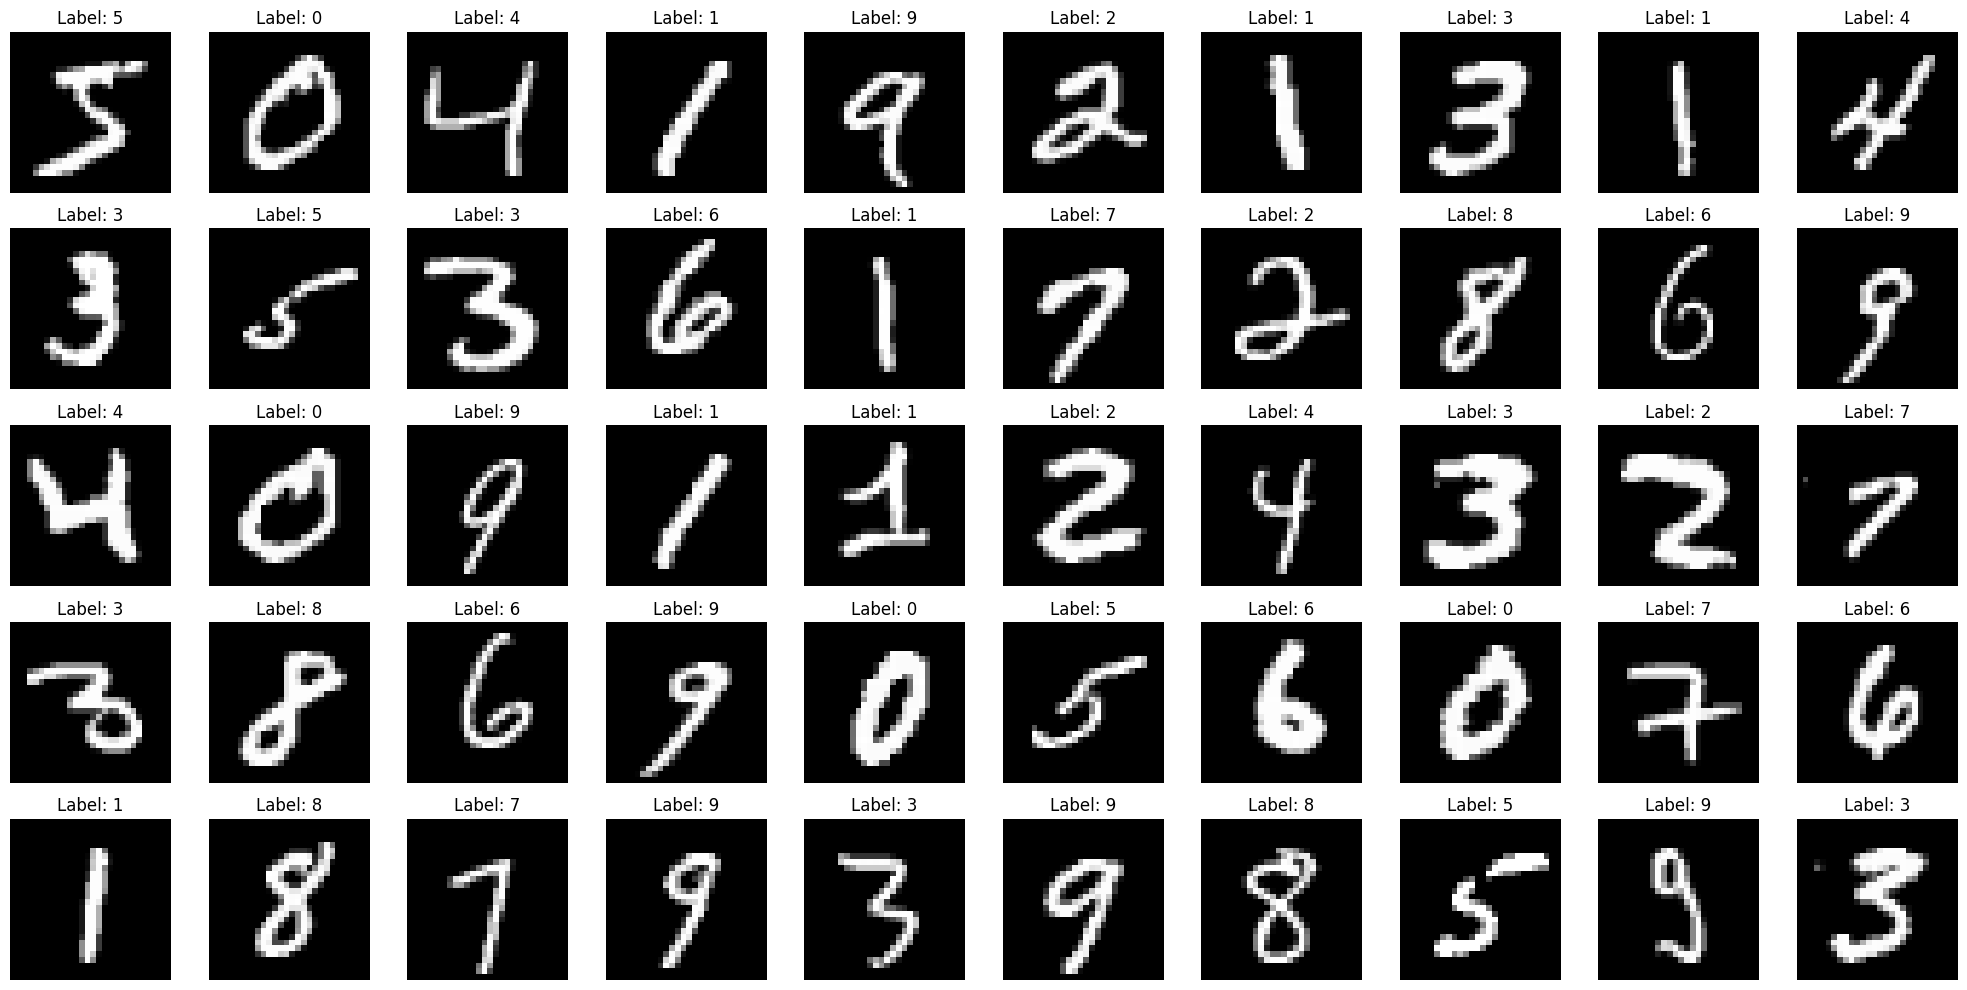

In [14]:
# Load MNIST dataset as an example
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Reshape data for CNN
x_train_cnn = np.expand_dims(x_train, -1)
x_test_cnn = np.expand_dims(x_test, -1)

# Flatten data for Autoencoder
x_train_flat = x_train.reshape((x_train.shape[0], -1))
x_test_flat = x_test.reshape((x_test.shape[0], -1))

# Display a 5x3 grid of the dataset samples
def plot_sample_grid(x_train, y_train, num_rows=5, num_cols=3):
    plt.figure(figsize=(num_cols * 2, num_rows * 2))
    for i in range(num_rows * num_cols):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(x_train[i], cmap='gray')
        plt.title(f"Label: {y_train[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_sample_grid(x_train, y_train)


CIFAR-10 Dataset

In [ ]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Reshape data for CNN
x_train_cnn = x_train
x_test_cnn = x_test

# Flatten data for Autoencoder
x_train_flat = x_train.reshape((x_train.shape[0], -1))
x_test_flat = x_test.reshape((x_test.shape[0], -1))

# Display a 5x3 grid of the dataset samples
def plot_sample_grid_cifar(x_train, y_train, num_rows=5, num_cols=3):
    plt.figure(figsize=(num_cols * 2, num_rows * 2))
    for i in range(num_rows * num_cols):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(x_train[i])
        plt.title(f"Label: {y_train[i][0]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_sample_grid_cifar(x_train, y_train)

Fashion MNIST Dataset

In [ ]:
# Load Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Reshape data for CNN
x_train_cnn = np.expand_dims(x_train, -1)
x_test_cnn = np.expand_dims(x_test, -1)

# Flatten data for Autoencoder
x_train_flat = x_train.reshape((x_train.shape[0], -1))
x_test_flat = x_test.reshape((x_test.shape[0], -1))

# Display a 5x3 grid of the dataset samples
def plot_sample_grid_fashion(x_train, y_train, num_rows=5, num_cols=3):
    plt.figure(figsize=(num_cols * 2, num_rows * 2))
    for i in range(num_rows * num_cols):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(x_train[i], cmap='gray')
        plt.title(f"Label: {y_train[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_sample_grid_fashion(x_train, y_train)

Section 4: Apply DBSCAN

In [15]:
def apply_dbscan(features, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(features)
    return clusters

Section 5: Define PSO for Hyperparameter Optimization

In [16]:
class Particle:
    def __init__(self, bounds, num_dimensions):
        self.position = np.random.uniform(bounds[:, 0], bounds[:, 1], num_dimensions)
        self.velocity = np.random.uniform(-1, 1, num_dimensions)
        self.best_position = self.position.copy()
        self.best_score = float('inf')

def pso_optimize(fitness_function, bounds, num_dimensions, num_particles, num_iterations):
    particles = [Particle(bounds, num_dimensions) for _ in range(num_particles)]
    global_best_position = particles[0].position.copy()
    global_best_score = float('inf')

    best_clustering_iteration = None
    best_clustering_particle_index = None

    for iteration in range(num_iterations):
        for particle_index, particle in enumerate(particles):
            fitness_value = fitness_function(particle.position)
            if fitness_value < particle.best_score:
                particle.best_score = fitness_value
                particle.best_position = particle.position.copy()
            if fitness_value < global_best_score:
                global_best_score = fitness_value
                global_best_position = particle.position.copy()
                best_clustering_iteration = iteration
                best_clustering_particle_index = particle_index

            # Print the parameters of the current particle
            print(f"Iteration {iteration + 1}, Particle {particle_index + 1}, Position: {particle.position}")

            # Plotting after each particle processing
            plot_clustering(iteration, particle_index, particle.position, combined_features)

        for particle in particles:
            inertia = 0.5
            cognitive = 0.8
            social = 0.9
            r1, r2 = np.random.rand(2)

            particle.velocity = (inertia * particle.velocity) + \
                                (cognitive * r1 * (particle.best_position - particle.position)) + \
                                (social * r2 * (global_best_position - particle.position))
            particle.position += particle.velocity

            # Ensure particles stay within bounds
            particle.position = np.clip(particle.position, bounds[:, 0], bounds[:, 1])

    return global_best_position, global_best_score, best_clustering_iteration, best_clustering_particle_index


Section 6: Define Fitness Function

In [17]:
def fitness_function(params):
    eps, min_samples = params[0], int(params[1])
    first_layer_neurons = int(params[2])
    second_layer_neurons = int(params[3])
    num_filters = int(params[4])
    kernel_size = int(params[5])

    # Rebuild and train autoencoder
    autoencoder, encoder = build_autoencoder(input_dim=x_train_flat.shape[1],
                                             first_layer_neurons=first_layer_neurons,
                                             second_layer_neurons=second_layer_neurons)
    autoencoder.fit(x_train_flat, x_train_flat, epochs=10, batch_size=256, shuffle=True, verbose=0)

    # Rebuild and train CNN
    cnn_model = build_cnn(input_shape=(28, 28, 1), num_filters=num_filters, kernel_size=kernel_size)
    cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
    cnn_model.fit(x_train_cnn, y_train, epochs=10, batch_size=256, shuffle=True, verbose=0)

    # Extract features
    encoded_features = encoder.predict(x_train_flat)
    cnn_features = cnn_model.predict(x_train_cnn)
    combined_features = np.concatenate((encoded_features, cnn_features), axis=1)

    clusters = apply_dbscan(combined_features, eps, min_samples)
    if len(set(clusters)) <= 1:  # DBSCAN failed to find clusters
        return float('inf')
    score = silhouette_score(combined_features, clusters)
    return -score  # Negative score because PSO minimizes the fitness function


Section 7: Plotting Function

In [18]:
def plot_clustering(iteration, particle_index, params, combined_features):
    eps, min_samples, _, _, _, _ = params
    clusters = apply_dbscan(combined_features, eps, int(min_samples))

    pca = PCA(n_components=2)
    reduced_features = pca.fit_transform(combined_features)

    plt.figure(figsize=(10, 7))
    plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=clusters, cmap='viridis')
    plt.colorbar()
    plt.title(f'ODNN-DBSCAN Clustering Results\nIteration {iteration + 1}, Particle {particle_index + 1}')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()


Section 8: Optimize Hyperparameters with PSO

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step
Iteration 1, Particle 1, Position: [  1.88893489   9.77844429 218.07228255  63.0541286   27.97449016
   4.45590522]


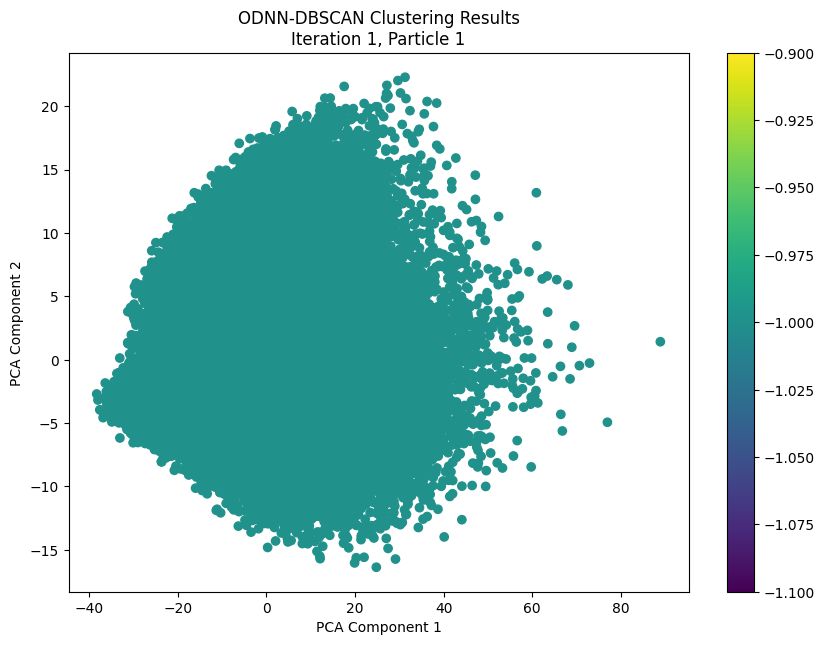

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step
Iteration 1, Particle 2, Position: [  0.49017656   3.55115085 147.00180577  67.9027885   19.96718777
   2.75754741]


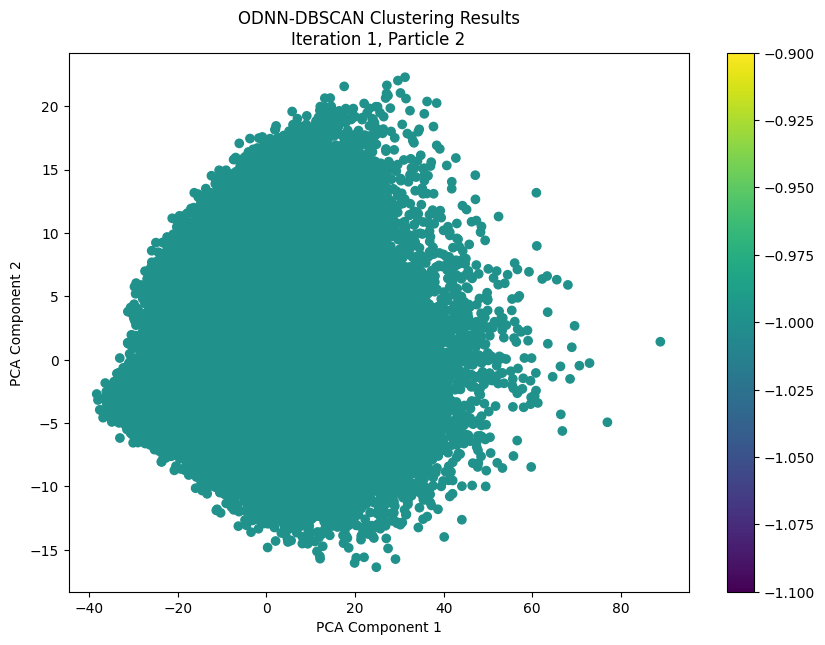

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step
Iteration 1, Particle 3, Position: [  0.63380676   9.62755703 101.23847893  69.77085848  59.26156289
   3.36508508]


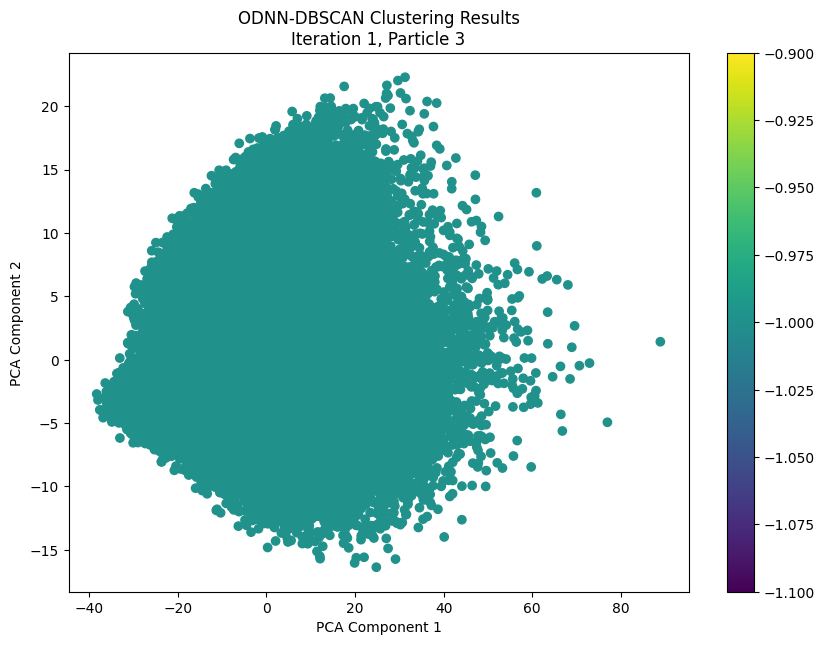

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step
Iteration 1, Particle 4, Position: [  0.28344986  18.07327486 154.89750654 126.08400556  34.85667454
   3.42123202]


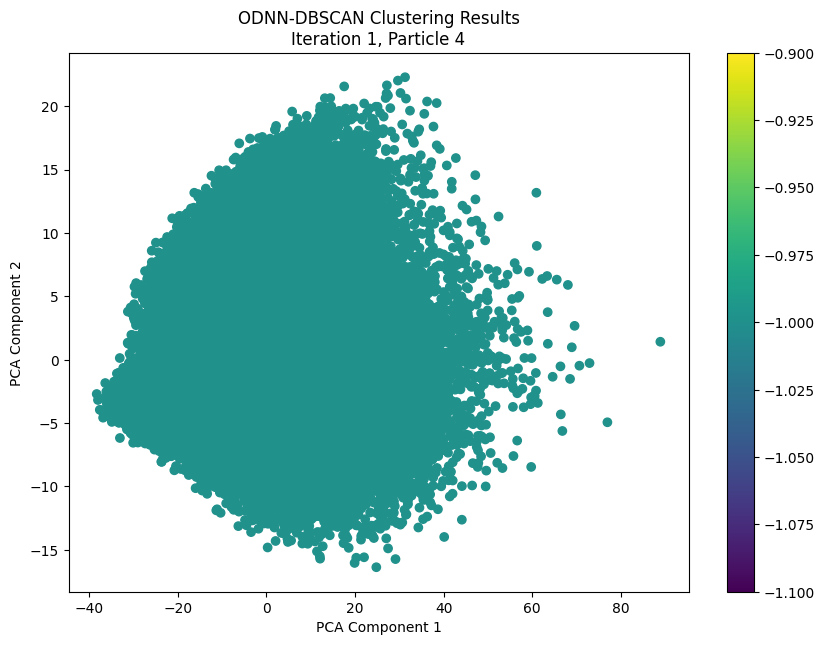

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step
Iteration 1, Particle 5, Position: [  0.91410712   2.58486235 213.34931006  83.8864761   16.06493537
   3.82508668]


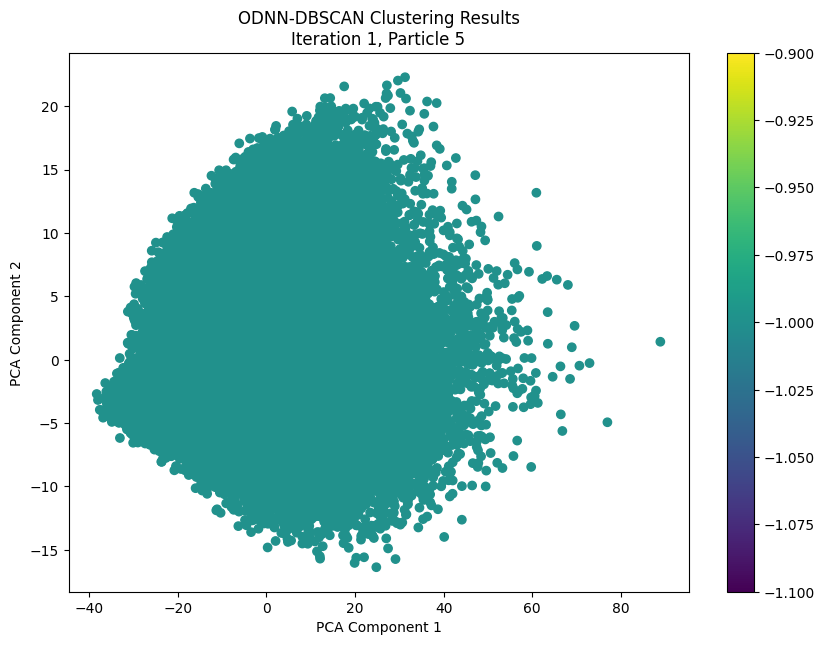

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step
Iteration 2, Particle 1, Position: [  1.84945334   9.57523928 218.17507189  63.27179477  27.89801997
   4.21263404]


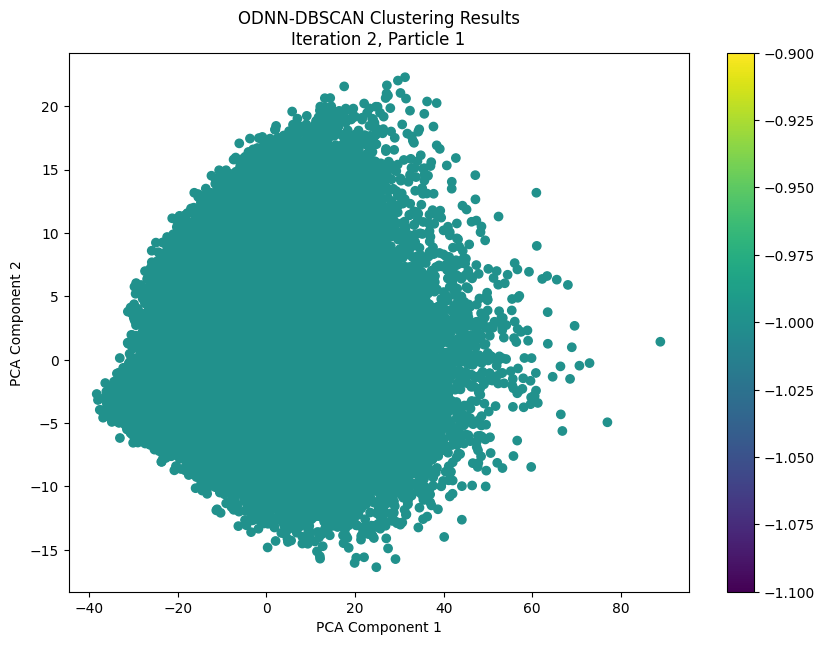

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step
Iteration 2, Particle 2, Position: [  0.74416915   6.35192352 174.38456813  65.95337389  22.67542491
   3.02229239]


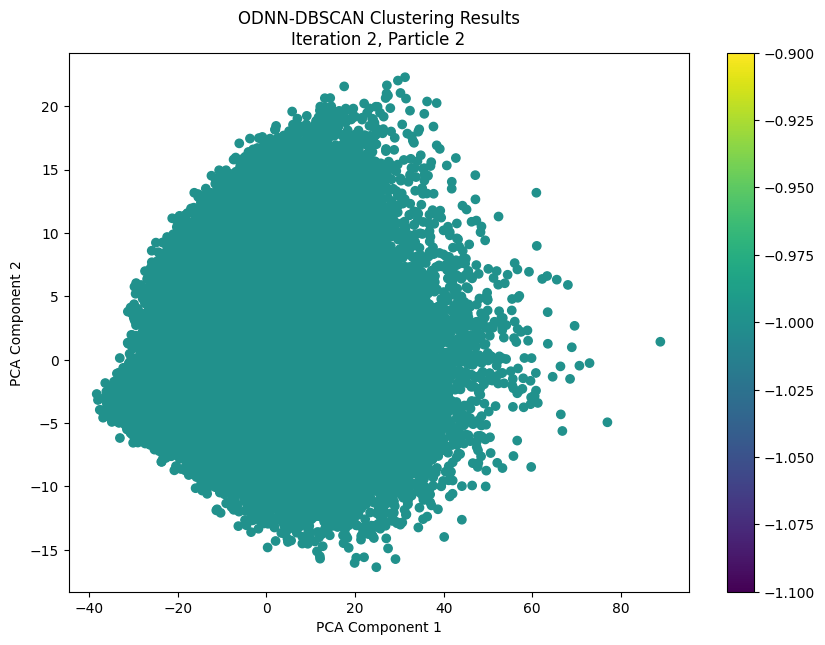

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step
Iteration 2, Particle 3, Position: [  1.12093528   9.42633325 145.00067437  66.91137439  47.70698824
   3.5505192 ]


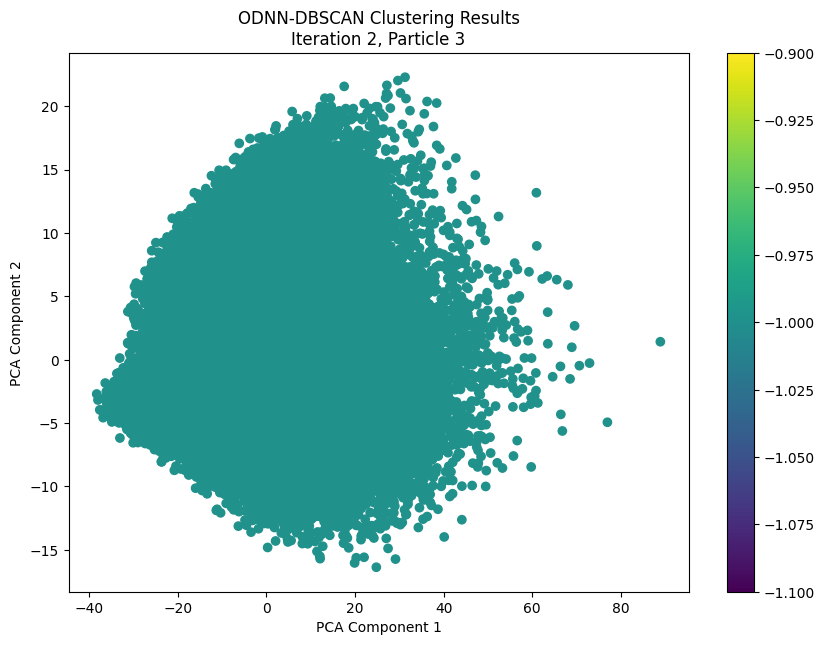

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step
Iteration 2, Particle 4, Position: [  0.19415439  16.35198932 167.6246002  113.74098269  33.65230785
   3.23998542]


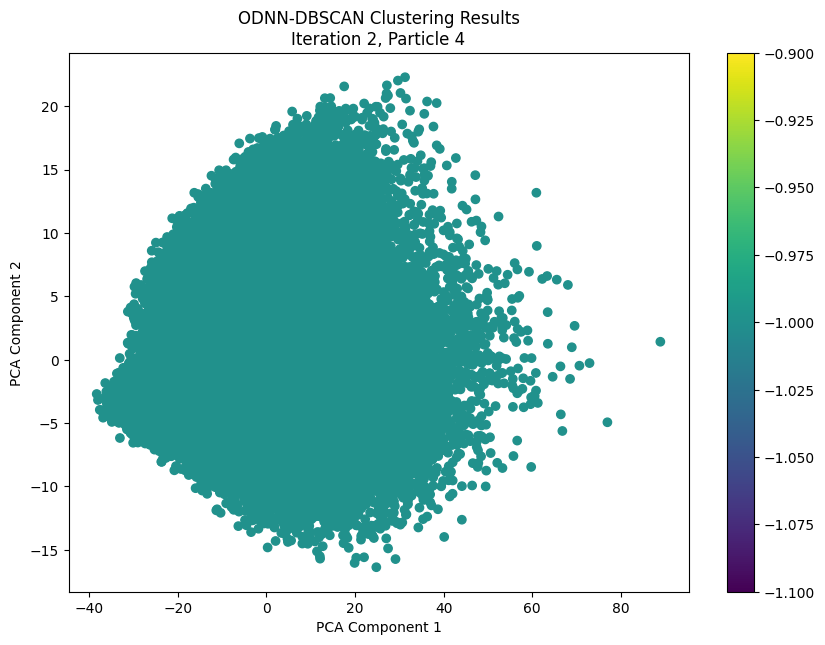

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step
Iteration 2, Particle 5, Position: [  1.3898388    4.12318194 214.44791931  78.64481974  19.5696745
   3.69865904]


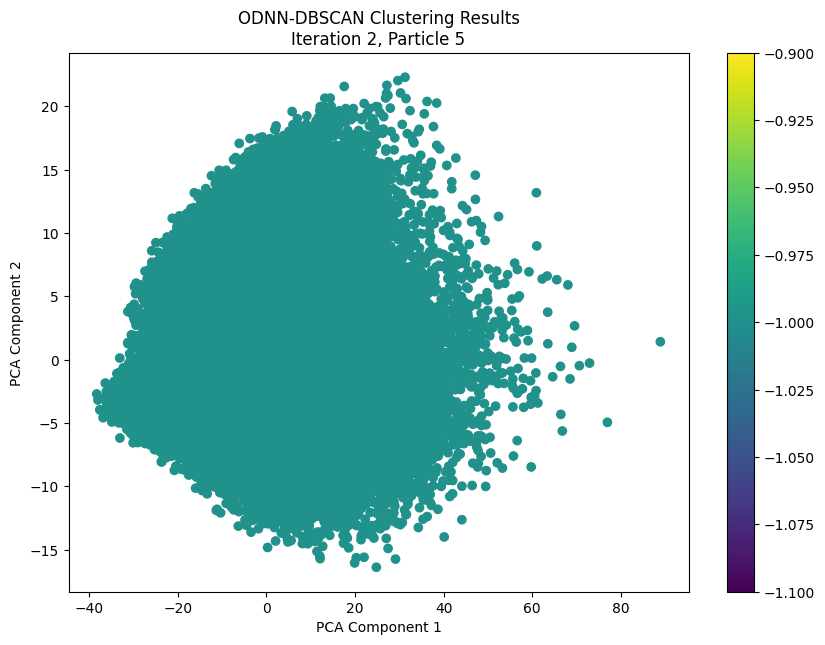

Best parameters: [  1.88893489   9.77844429 218.07228255  63.0541286   27.97449016
   4.45590522]
Best silhouette score: -inf


In [19]:
bounds = np.array([
    [0.1, 2.0],  # Bounds for eps
    [2, 20],  # Bounds for min_samples
    [64, 256],  # Bounds for first_layer_neurons (Autoencoder)
    [32, 128],  # Bounds for second_layer_neurons (Autoencoder)
    [16, 64],  # Bounds for num_filters (CNN)
    [2, 5]  # Bounds for kernel_size (CNN)
])

num_dimensions = bounds.shape[0]
num_particles = 5  # Reduced number of particles
num_iterations = 2  # Reduced number of iterations

# Initial combined_features with random parameters to pass to plot_clustering
initial_params = bounds[:, 0] + (bounds[:, 1] - bounds[:, 0]) / 2
initial_eps, initial_min_samples, initial_first_layer_neurons, initial_second_layer_neurons, initial_num_filters, initial_kernel_size = initial_params

autoencoder, encoder = build_autoencoder(input_dim=x_train_flat.shape[1],
                                         first_layer_neurons=int(initial_first_layer_neurons),
                                         second_layer_neurons=int(initial_second_layer_neurons))
autoencoder.fit(x_train_flat, x_train_flat, epochs=10, batch_size=256, shuffle=True, verbose=0)

cnn_model = build_cnn(input_shape=(28, 28, 1), num_filters=int(initial_num_filters), kernel_size=int(initial_kernel_size))
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
cnn_model.fit(x_train_cnn, y_train, epochs=10, batch_size=256, shuffle=True, verbose=0)

encoded_features = encoder.predict(x_train_flat)
cnn_features = cnn_model.predict(x_train_cnn)
combined_features = np.concatenate((encoded_features, cnn_features), axis=1)

best_params, best_score, best_iteration, best_particle_index = pso_optimize(fitness_function, bounds, num_dimensions, num_particles, num_iterations)
print(f"Best parameters: {best_params}")
print(f"Best silhouette score: {-best_score}")
print(f"Best clustering found at iteration {best_iteration + 1}, particle {best_particle_index + 1}")


Section 9: Apply DBSCAN with Optimized Parameters

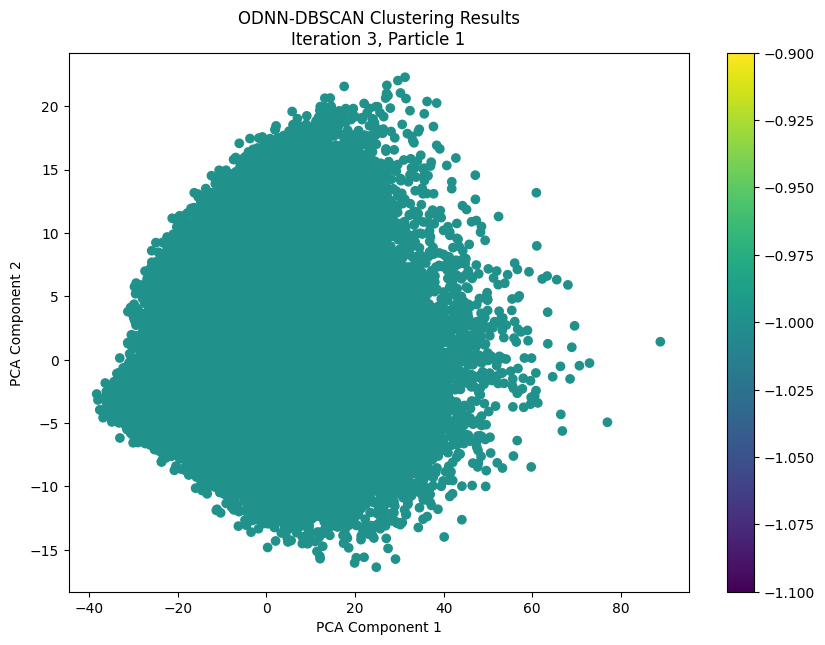

In [20]:
optimized_eps, optimized_min_samples, _, _, _, _ = best_params
final_clusters = apply_dbscan(combined_features, optimized_eps, int(optimized_min_samples))

# Plot final clustering results
plot_clustering(num_iterations, 0, best_params, combined_features)


Implementations

In [ ]:
optimized_eps, optimized_min_samples, _, _, _, _ = best_params
final_clusters = apply_dbscan(combined_features, optimized_eps, int(optimized_min_samples))

# Plot final clustering results
plot_clustering(best_iteration, best_particle_index, best_params, combined_features)
